/tmp/ipykernel_4223/3517405454.py:51: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([x_optimal_initial, x_optimal_initial], [y_optimal_initial, (compensated_income - new_price1*x_optimal_initial)/price2], 'bo-', linestyle='dashed')
/tmp/ipykernel_4223/3517405454.py:54: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([x_optimal_initial, x_optimal_new], [(compensated_income - new_price1*x_optimal_initial)/price2, y_optimal_new], 'ro-', linestyle='dashed')


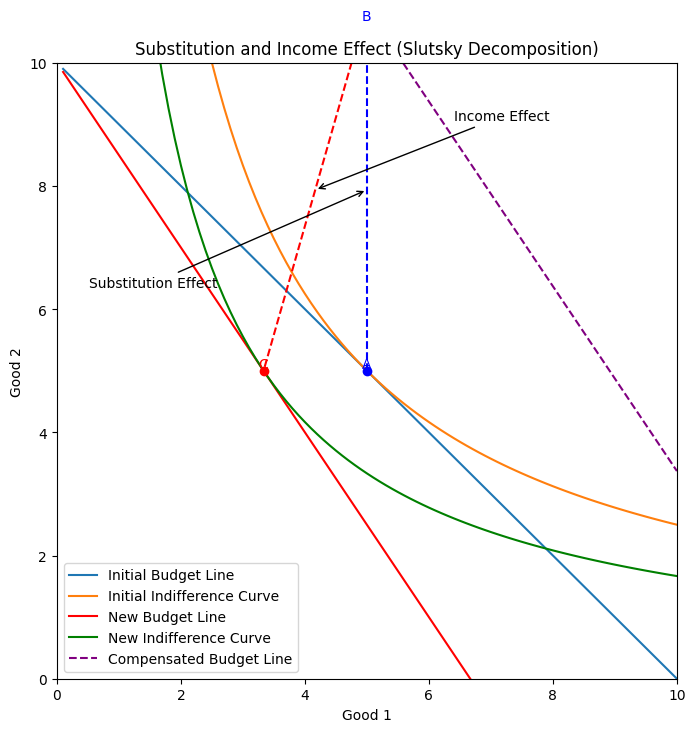

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 参数设定
price1 = 1
price2 = 1
income = 10
a = 0.5  # Cobb-Douglas参数
b = 0.5  # Cobb-Douglas参数

# 商品1和商品2的数量
x = np.linspace(0.1, income/price1, 100)

# 绘制初始预算线和效用等高线
fig, ax = plt.subplots(figsize=(8, 8))

y1 = (income - price1*x)/price2
ax.plot(x, y1, label='Initial Budget Line')

# 初始效用最大化的点
x_optimal_initial = income/(2*price1)
y_optimal_initial = income/(2*price2)

# 初始效用等高线
y2 = ((x_optimal_initial**a * y_optimal_initial**b) / x**a)**(1/b)
ax.plot(x, y2, label='Initial Indifference Curve')

# 新的价格
new_price1 = 1.5

y1_new = (income - new_price1*x)/price2
ax.plot(x, y1_new, color='red', label='New Budget Line')

# 新效用最大化的点
x_optimal_new = income/(2*new_price1)
y_optimal_new = income/(2*price2)

# 新的效用等高线
y2_new = ((x_optimal_new**a * y_optimal_new**b) / x**a)**(1/b)
ax.plot(x, y2_new, color='green', label='New Indifference Curve')

# 计算补偿预算线，使其与新的效用等高线相切
# 这里我们需要解决的是在新价格下，使得消费者的效用等于初始效用的最小收入水平
compensated_income = (x_optimal_initial**a * y_optimal_initial**b) / ((x_optimal_new**a * y_optimal_new**b) / compensated_income)

# 绘制补偿预算线
y_compensated = (compensated_income - new_price1*x)/price2
ax.plot(x, y_compensated, color='purple', linestyle='dashed', label='Compensated Budget Line')

# 绘制从初始最优点到补偿预算线上的最优点的线
ax.plot([x_optimal_initial, x_optimal_initial], [y_optimal_initial, (compensated_income - new_price1*x_optimal_initial)/price2], 'bo-', linestyle='dashed')

# 绘制从补偿预算线上的最优点到新的最优点的线
ax.plot([x_optimal_initial, x_optimal_new], [(compensated_income - new_price1*x_optimal_initial)/price2, y_optimal_new], 'ro-', linestyle='dashed')

# 添加文字标注
ax.text(x_optimal_initial, y_optimal_initial, 'A', ha='center', va='bottom', color='blue')
ax.text(x_optimal_initial, (compensated_income - new_price1*x_optimal_initial)/price2, 'B', ha='center', va='top', color='blue')
ax.text(x_optimal_new, y_optimal_new, 'C', ha='center', va='bottom', color='red')

# 添加箭头和文字标注
ax.annotate('Substitution Effect',
            xy=((x_optimal_initial+x_optimal_initial)/2, (y_optimal_initial+(compensated_income - new_price1*x_optimal_initial)/price2)/2),
            xytext=(-200, -70),
            textcoords='offset points',
            arrowprops=dict(facecolor='blue', arrowstyle='->'))

ax.annotate('Income Effect',
            xy=((x_optimal_initial+x_optimal_new)/2, ((compensated_income - new_price1*x_optimal_initial)/price2+y_optimal_new)/2),
            xytext=(100, 50),
            textcoords='offset points',
            arrowprops=dict(facecolor='red', arrowstyle='->'))

ax.set_xlim(0, income/price1)
ax.set_ylim(0, income/price2)
ax.set_xlabel('Good 1')
ax.set_ylabel('Good 2')
ax.set_title('Substitution and Income Effect (Slutsky Decomposition)')
ax.legend()

plt.show()
